In [1]:
# Visualization purpose
!pip install tensorboardX
!pip install tensorboard
!pip install tensorboard-plugin-customizable-plots


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install split-folders
!pip install optuna
!pip install --upgrade nvidia-ml-py3
!pip install codecarbon


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import shutil
import splitfolders
from pathlib import Path
import imghdr
import numpy as np
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt 
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

C:\Users\Dinny\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data_dir = 'dataset/'

In [5]:
def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

folder_path = 'working'
remove_folder_contents(folder_path)

[WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'C:/Users/Dinny/Desktop/Diploma/Model/working\\data\\val\\plastic\\plastic92.jpg'
[WinError 145] Папка не пуста: 'C:/Users/Dinny/Desktop/Diploma/Model/working\\data\\val\\plastic'
[WinError 145] Папка не пуста: 'C:/Users/Dinny/Desktop/Diploma/Model/working\\data\\val'
[WinError 145] Папка не пуста: 'C:/Users/Dinny/Desktop/Diploma/Model/working\\data'


In [6]:
shutil.copytree(data_dir, 'working/dataset')

'C:/Users/Dinny/Desktop/Diploma/Model/working/dataset'

In [7]:
data_dir = 'working/dataset'

In [8]:
experiment_name = "Transfer Learning"

In [9]:
count=0
image_extensions = [".png", ".jpg"] 
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        if img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)
            count+=1
print(f"Removed {count} images")

C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\cardboard\cardboard_1110.jpg is not an image
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\cardboard\cardboard_1110.jpg is a None, not accepted by TensorFlow
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\cardboard\cardboard_1141.jpg is not an image
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\cardboard\cardboard_1141.jpg is a None, not accepted by TensorFlow
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\cardboard\cardboard_1300.jpg is not an image
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\cardboard\cardboard_1300.jpg is a None, not accepted by TensorFlow
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\cardboard\cardboard_1780.jpg is not an image
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\cardboard\cardboard_1780.jpg is a None, not accepted by TensorFlow
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\cardboard\cardboard_2011.jpg is not an image
C:\Users\Dinny\Desktop\Diploma

C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\plastic\plastic_2038.jpg is not an image
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\plastic\plastic_2038.jpg is a None, not accepted by TensorFlow
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\plastic\plastic_2094.jpg is not an image
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\plastic\plastic_2094.jpg is a None, not accepted by TensorFlow
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\plastic\plastic_2105.jpg is not an image
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\plastic\plastic_2105.jpg is a None, not accepted by TensorFlow
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\plastic\plastic_222.jpg is not an image
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\plastic\plastic_222.jpg is a None, not accepted by TensorFlow
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\plastic\plastic_2377.jpg is not an image
C:\Users\Dinny\Desktop\Diploma\Model\working\dataset\plastic\plastic

In [10]:
os.mkdir('data')

In [11]:
os.chdir('data')

In [12]:
os.getcwd()

'C:\\Users\\Dinny\\Desktop\\Diploma\\Model\\data'

In [13]:
os.mkdir('train')
os.mkdir('test')
os.mkdir('val')

In [14]:
os.chdir('working/')

In [15]:
os.getcwd()

'C:\\Users\\Dinny\\Desktop\\Diploma\\Model\\working'

In [16]:
SEED = 43

In [17]:
splitfolders.ratio("working/dataset", output = 'data', seed = SEED, ratio = (.8,.1,.1), group_prefix = None)

Copying files: 16282 files [00:44, 367.38 files/s]


In [18]:
try:
    shutil.rmtree(data_dir)
except OSError as e:
    print("Error: %s : %s" % (data_dir, e.strerror))

In [19]:
train_path = 'working/data/train'
val_path = 'working/data/val'
test_path = 'working/data/test'

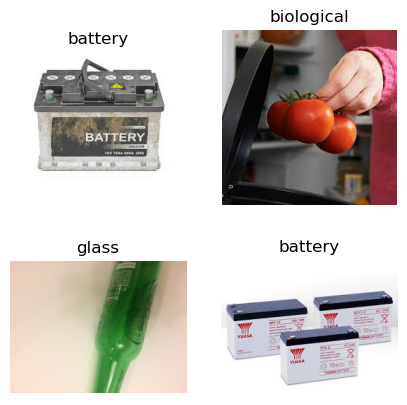

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (5,5))
axes = axes.ravel() 

for i in np.arange(0, 4): 

    category = random.choice(os.listdir(train_path))
    class_dir = os.path.join(train_path, category)

    image = random.choice(os.listdir(class_dir))
 
    img = plt.imread(os.path.join(class_dir,image))
    axes[i].imshow( img )
    axes[i].set_title(category) 
    axes[i].axis('off')

In [21]:
total = 0
for category in os.listdir(train_path):
    count= 0
    for image in os.listdir(train_path + "/" + category):
        count += 1
        total +=1
    print(str(category).title() + ": " + str(count))  
print(f"\nTotal number of train images: {total}")

Battery: 756
Biological: 788
Cardboard: 1864
Glass: 3272
Metal: 1494
Paper: 2169
Plastic: 2013
Trash: 667

Total number of train images: 13023


In [22]:
class_names = sorted(os.listdir(train_path))
class_names

['battery',
 'biological',
 'cardboard',
 'glass',
 'metal',
 'paper',
 'plastic',
 'trash']

In [23]:
class_dis = [len(os.listdir(train_path + f"/{name}")) for name in class_names]
class_dis

[756, 788, 1864, 3272, 1494, 2169, 2013, 667]

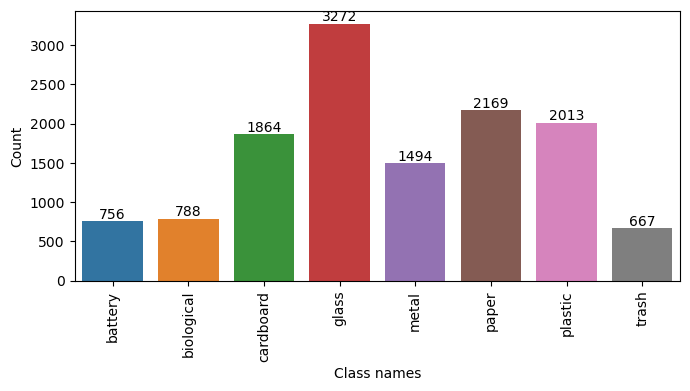

In [24]:
DF = pd.DataFrame(columns=['Class names','Count'])
DF['Class names']=class_names
DF['Count']=class_dis
plt.figure(figsize=(7,4))
ax=sns.barplot(x='Class names', y='Count', data=DF)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

In [25]:
for category in os.listdir(train_path):
    count = 0
    delete = 0
    for image in os.listdir(train_path + '/'  + category):
        count += 1
        while count > 1000:
            random_image = random.choice(os.listdir(train_path + '/' + category)) 
            delete_image = train_path + '/'  + category +  '/' + random_image
            os.remove(delete_image)
            delete+=1
            count-=1
           
    print(f'Deleted {delete} in {category}')

Deleted 0 in battery
Deleted 0 in biological
Deleted 864 in cardboard
Deleted 2272 in glass
Deleted 494 in metal
Deleted 1169 in paper
Deleted 1013 in plastic
Deleted 0 in trash


In [26]:
class_dis = [len(os.listdir(train_path + f"/{name}")) for name in class_names]

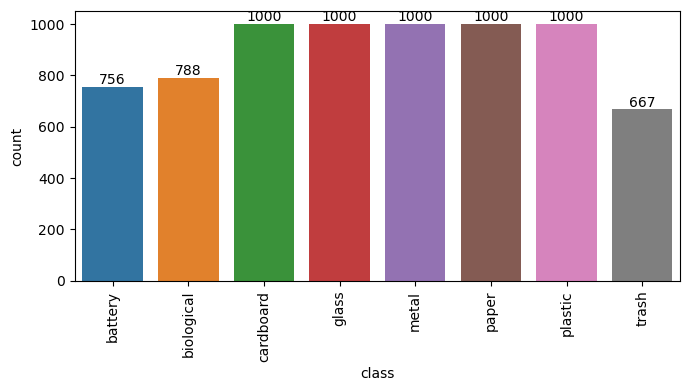

In [27]:
DF = pd.DataFrame(columns=['class','count'])
DF['class']=class_names
DF['count']=class_dis
plt.figure(figsize=(7,4))
ax=sns.barplot(x='class', y='count', data=DF)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

In [28]:
data_path = 'working/data'

In [29]:
width = []
height = []
from PIL import Image
import numpy as np

for dirname in os.listdir(data_path):
    for category in os.listdir(data_path + '/' + dirname):
        for image in os.listdir(data_path + '/' + dirname + '/' + category):
            img = Image.open(data_path + '/' + dirname + '/' + category + '/' + image)
            width.append(img.width)
            height.append(img.height)

print('Mean width: {:.4f}'.format(np.mean(width)))
print('Mean Height: {:.4f}'.format(np.mean(height)))

Mean width: 431.2833
Mean Height: 384.8422


In [30]:
IMG_SIZE = (400, 400)

In [31]:
BATCH_SIZE = 32

In [32]:
writer = SummaryWriter()

In [33]:
train_data = tf.keras.utils.image_dataset_from_directory(train_path,
                                                         image_size=IMG_SIZE,
                                                         label_mode='categorical',
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         seed=SEED)

Found 7211 files belonging to 8 classes.


In [34]:
test_data = tf.keras.utils.image_dataset_from_directory(test_path,
                                                        image_size=IMG_SIZE,
                                                        label_mode='categorical',
                                                        batch_size=BATCH_SIZE,
                                                        shuffle=False)

Found 1634 files belonging to 8 classes.


In [35]:
validation_data = tf.keras.utils.image_dataset_from_directory(val_path,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE,
                                                              shuffle=True,
                                                              seed=SEED)

Found 1626 files belonging to 8 classes.


In [36]:
train_log_dir = os.path.join("logs", experiment_name, "train")
test_log_dir = os.path.join("logs", experiment_name, "test")

os.makedirs(train_log_dir, exist_ok=True)
os.makedirs(test_log_dir, exist_ok=True)

train_writer = SummaryWriter(train_log_dir)
test_writer = SummaryWriter(test_log_dir)

In [37]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>